You are provided with a dataset labelled "Assignment2.csv". Use the dataset to make insights on;

It is hypothesised that the variables "BMI", "DiffWalking", "AgeCategory", "PhysicalActivity" and "GenHealth" are key indicators for HeartDisease. Is this true? [10 MARKS]

An association is believed to exist between "AgeCategory" and "GenHealth." Is this a statistically sound belief? [10 MARKS]

What is the association  between "GenHealth" across the different age categories? [10 MARKS]

# S22B23/010 
# A99501
# ASSIGNMENT 2

In [5]:
# import dataset
import pandas as pd #import and transform-data import seaborn as sn #Generates visuals
import seaborn as sn
import numpy as np #structuring data
import matplotlib as mat #Generates visuals

In [6]:
data4=pd.read_csv("Ass2Data.csv")

In [112]:
data4.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [123]:
data4.duplicated().sum()

18078

In [7]:
data3=data4.drop_duplicates()

In [8]:
data3

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [128]:
# Identify variables by their data types
cat = []
cont = []

for column in data3.columns:
    if data3[column].dtype == object or len(data3[column].unique()) <= 7:
        cat.append(column)
    else:
        cont.append(column)

# Display the categorization
print("Categorical Columns:")
print(cat)
print("\nContinuous Columns:")
print(cont)

Categorical Columns:
['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

Continuous Columns:
['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']


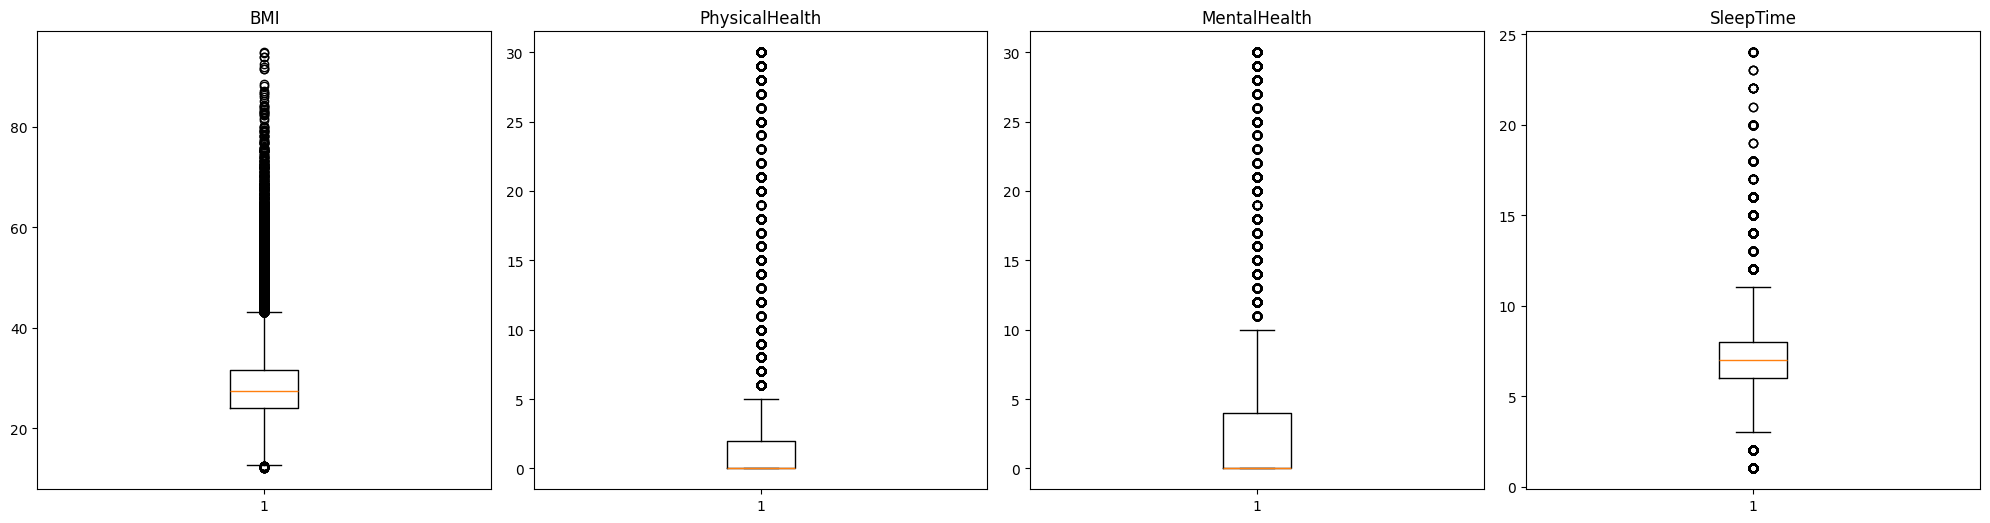

In [129]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(cont):
    plt.subplot(4, 4, i+1)
    plt.boxplot(data3[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [130]:
import pandas as pd

# Assuming your data is in a pandas DataFrame called 'data3'
# and the columns with potential outliers are 'BMI', 'PhysicalHealth', 'MentalHealth'

def count_outliers(data3, column_name):
  """
  Calculates the number of outliers in a specified column of a pandas DataFrame 
  using the IQR method.

  Args:
    data3: The pandas DataFrame.
    column_name: The name of the column to check for outliers.

  Returns:
    The number of outliers in the column.
  """
  Q1 = data3[column_name].quantile(0.25)
  Q3 = data3[column_name].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = data3[(data3[column_name] < lower_bound) | (data3[column_name] > upper_bound)]
  return len(outliers)

# Count outliers in each column
bmi_outliers = count_outliers(data3, 'BMI')
physical_outliers = count_outliers(data3, 'PhysicalHealth')
mental_outliers = count_outliers(data3, 'MentalHealth')

print("Number of BMI outliers:", bmi_outliers)
print("Number of PhysicalHealth outliers:", physical_outliers)
print("Number of MentalHealth outliers:", mental_outliers)

# Calculate the total number of outliers across all three columns
total_outliers = bmi_outliers + physical_outliers + mental_outliers
print("Total number of outliers:", total_outliers)

Number of BMI outliers: 8905
Number of PhysicalHealth outliers: 47136
Number of MentalHealth outliers: 39713
Total number of outliers: 95754


In [134]:
data3.shape

(301717, 18)

``Outliers constitute more than 30% of the data.``


In [95]:
import mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [142]:
# ANOVA TEST BETWEEN BMI AND HeartDisease

import scipy.stats as stats

#ANOVA tests:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)


In [2]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['HeartDisease']
FunctionAnova(inpData=data3, 
              TargetVariable='BMI',
              CategoricalPredictorList=CategoricalPredictorList)


NameError: name 'FunctionAnova' is not defined

```markdown
Since the ANOVA test shows that BMI is related to HeartDisease (as indicated by the p-value), it can be considered a key indicator for HeartDisease.
```

In [3]:
import warnings
warnings.filterwarnings('ignore')


In [147]:
cont_df = data3[cont]
cat_df = data3[cat]

In [162]:
# import the required library to generate a contigency table
from scipy.stats import chi2_contingency
# Chi-Square Test between AgeCategory and HeartDisease
# Generate a cross-tabulation between 'AgeCategory' and 'HeartDisease'

CrosstabResult = pd.crosstab(index=cat_df['HeartDisease'], columns=cat_df['AgeCategory'])
print(CrosstabResult)

# Perform Chi-square test
ChiSqResult = chi2_contingency(CrosstabResult)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

AgeCategory   18-24  25-29  30-34  35-39  40-44  45-49  50-54  55-59  60-64  \
HeartDisease                                                                  
No            19868  16179  17727  19230  19351  19775  22353  25411  27898   
Yes             130    133    226    296    486    743   1383   2199   3321   

AgeCategory   65-69  70-74  75-79  80 or older  
HeartDisease                                    
No            27596  24456  16686        17926  
Yes            4074   4817   4027         5426  
The P-Value of the ChiSq Test is: 0.0


In [163]:
# import the required library to generate a contigency table
from scipy.stats import chi2_contingency
# Chi-Square Test between AgeCategory and HeartDisease
# Generate a cross-tabulation between 'AgeCategory' and 'HeartDisease'

CrosstabResult = pd.crosstab(index=cat_df['HeartDisease'], columns=cat_df['DiffWalking'])
print(CrosstabResult)

# Perform Chi-square test
ChiSqResult = chi2_contingency(CrosstabResult)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

DiffWalking       No    Yes
HeartDisease               
No            240125  34331
Yes            17237  10024
The P-Value of the ChiSq Test is: 0.0


In [167]:
# import the required library to generate a contigency table
from scipy.stats import chi2_contingency
# Chi-Square Test between AgeCategory and HeartDisease
# Generate a cross-tabulation between 'AgeCategory' and 'HeartDisease'

CrosstabResult = pd.crosstab(index=cat_df['HeartDisease'], columns=cat_df['PhysicalActivity'])
print(CrosstabResult)

# Perform Chi-square test
ChiSqResult = chi2_contingency(CrosstabResult)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

PhysicalActivity     No     Yes
HeartDisease                   
No                61423  213033
Yes                9882   17379
The P-Value of the ChiSq Test is: 0.0


In [168]:

CrosstabResult = pd.crosstab(index=cat_df['HeartDisease'], columns=cat_df['GenHealth'])
print(CrosstabResult)

# Perform Chi-square test
ChiSqResult = chi2_contingency(CrosstabResult)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

GenHealth     Excellent   Fair   Good  Poor  Very good
HeartDisease                                          
No                58242  27576  81734  7436      99468
Yes                1495   7083   9505  3850       5328
The P-Value of the ChiSq Test is: 0.0


```
Since the Chi-square test p-value is 0 for `AgeCategory`, `DiffWalking`, `PhysicalActivity`, and `GenHealth`, we fail to reject the null hypothesis. This indicates that there is a significant association, making these variables key indicators of HeartDisease.


# 2

`` To find if there is an association between AgeCategory and GenHealth statistically, we will use dython library to generate Cramer's V association results ``

In [22]:
!pip install association_metrics
import association_metrics as am

In [23]:
data6=data3[["AgeCategory", "GenHealth"]]
data6

,AgeCategory,GenHealth
0,55-59,Very good
1,80 or older,Very good
2,65-69,Fair
3,75-79,Good
4,40-44,Very good
...,...,...
319790,60-64,Fair
319791,35-39,Very good
319792,45-49,Good
319793,25-29,Good


In [24]:
# Convert object columns to Category columns
df = data6.apply(
        lambda x: x.astype("category") if x.dtype == "O" else x)


In [25]:
# Initialize a CramersV object using the pandas.DataFrame (df)
cramers_v = am.CramersV(df)

In [26]:
#Generate the cramer's v results
cfit = cramers_v.fit().round(2)
cfit

,AgeCategory,GenHealth
AgeCategory,1.0,0.1
GenHealth,0.1,1.0


``using Cramer's V, we found a statistical association between `AgeCategory` and `GenHealth` of value 0.1.``

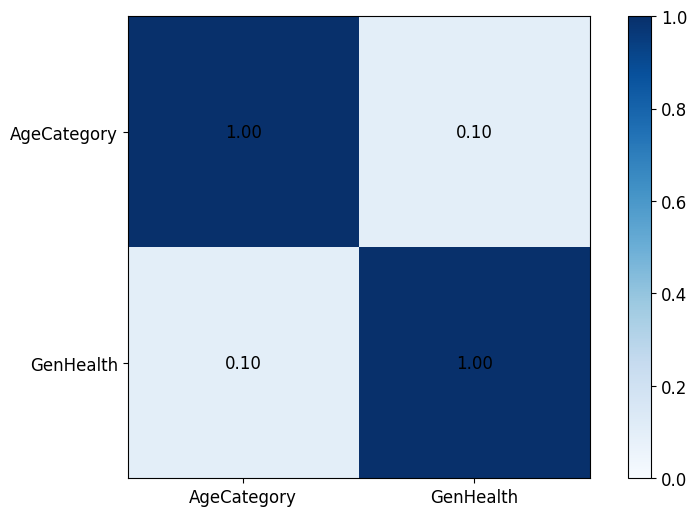

In [27]:
#To generate a pairwise association plot
# Instantiating a figure and axes object
fig, ax = plt.subplots(figsize = (10, 6))
# Generate a plot
cax = ax.imshow(cfit.values, interpolation='nearest', cmap='Blues', vmin=0, vmax=1)
# Setting the axes labels
ax.set_xticks(ticks = range(len(cfit.columns)),
              labels = cfit.columns)
ax.set_yticks(ticks = range(len(cfit.columns)),
              labels = cfit.columns)
# Setting tick parameters
ax.tick_params(axis = "x", labelsize = 12, labelrotation = 0)
ax.tick_params(axis = "y", labelsize = 12, labelrotation = 0)
# Adding a colorbar
fig.colorbar(cax).ax.tick_params(labelsize = 12)
# Adding annotations
for (x, y), t in np.ndenumerate(cfit):
    ax.annotate("{:.2f}".format(t),
                xy = (x, y),
                va = "center",
                ha = "center").set(color = "black", size = 12)

# 3

In [9]:
data2=data3[["AgeCategory", "GenHealth"]]
data2

,AgeCategory,GenHealth
0,55-59,Very good
1,80 or older,Very good
2,65-69,Fair
3,75-79,Good
4,40-44,Very good
...,...,...
319790,60-64,Fair
319791,35-39,Very good
319792,45-49,Good
319793,25-29,Good


In [36]:
#View fertilizer transactions
transactions_data = [a[1]['GenHealth'].tolist() for a in list(data2.groupby(['AgeCategory']))]
#view 
transactions_data

[['Very good',
  'Excellent',
  'Excellent',
  'Fair',
  'Excellent',
  'Good',
  'Good',
  'Very good',
  'Very good',
  'Excellent',
  'Good',
  'Fair',
  'Good',
  'Very good',
  'Very good',
  'Good',
  'Excellent',
  'Excellent',
  'Good',
  'Excellent',
  'Very good',
  'Excellent',
  'Very good',
  'Very good',
  'Very good',
  'Excellent',
  'Good',
  'Excellent',
  'Good',
  'Good',
  'Good',
  'Very good',
  'Good',
  'Good',
  'Good',
  'Excellent',
  'Very good',
  'Good',
  'Very good',
  'Fair',
  'Very good',
  'Very good',
  'Fair',
  'Excellent',
  'Very good',
  'Very good',
  'Very good',
  'Very good',
  'Very good',
  'Very good',
  'Excellent',
  'Very good',
  'Excellent',
  'Very good',
  'Very good',
  'Good',
  'Very good',
  'Very good',
  'Good',
  'Excellent',
  'Excellent',
  'Excellent',
  'Very good',
  'Very good',
  'Very good',
  'Very good',
  'Excellent',
  'Very good',
  'Excellent',
  'Very good',
  'Very good',
  'Very good',
  'Good',
  'Excelle

In [37]:
#Encode the transactions
import mlxtend
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions_data).transform(transactions_data)

In [34]:
te_ary

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True]])

In [48]:
#Generate the newly transformed dataframe "cassava3"
transactions_data = pd.DataFrame(te_ary, columns=te.columns_)
data5 = transactions_data.describe()
#view result
data5

,Excellent,Fair,Good,Poor,Very good
count,13,13,13,13,13
unique,1,1,1,1,1
top,True,True,True,True,True
freq,13,13,13,13,13


In [49]:
data5.iloc[0]-data5.iloc[3]

Excellent    0
Fair         0
Good         0
Poor         0
Very good    0
dtype: object

In [42]:
f = data5.iloc[0]-data5.iloc[3]
a = f.tolist()
b = list(f.index)
item = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item = item.sort_values(['Count'], ascending=False).head(50)
transactions_data

[['Very good',
  'Excellent',
  'Excellent',
  'Fair',
  'Excellent',
  'Good',
  'Good',
  'Very good',
  'Very good',
  'Excellent',
  'Good',
  'Fair',
  'Good',
  'Very good',
  'Very good',
  'Good',
  'Excellent',
  'Excellent',
  'Good',
  'Excellent',
  'Very good',
  'Excellent',
  'Very good',
  'Very good',
  'Very good',
  'Excellent',
  'Good',
  'Excellent',
  'Good',
  'Good',
  'Good',
  'Very good',
  'Good',
  'Good',
  'Good',
  'Excellent',
  'Very good',
  'Good',
  'Very good',
  'Fair',
  'Very good',
  'Very good',
  'Fair',
  'Excellent',
  'Very good',
  'Very good',
  'Very good',
  'Very good',
  'Very good',
  'Very good',
  'Excellent',
  'Very good',
  'Excellent',
  'Very good',
  'Very good',
  'Good',
  'Very good',
  'Very good',
  'Good',
  'Excellent',
  'Excellent',
  'Excellent',
  'Very good',
  'Very good',
  'Very good',
  'Very good',
  'Excellent',
  'Very good',
  'Excellent',
  'Very good',
  'Very good',
  'Very good',
  'Good',
  'Excelle

In [50]:
#Import the apriori libraries and the association rules
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [51]:

#Look for the frequently used fertilizers

#We are using a minimum support value of 10%
freq_items = apriori(transactions_data, min_support=0.1, use_colnames=True, verbose=1)
freq_items

Processing 5 combinations | Sampling itemset size 54


,support,itemsets
0,1.0,(Excellent)
1,1.0,(Fair)
2,1.0,(Good)
3,1.0,(Poor)
4,1.0,(Very good)
5,1.0,"(Fair, Excellent)"
6,1.0,"(Good, Excellent)"
7,1.0,"(Poor, Excellent)"
8,1.0,"(Very good, Excellent)"
9,1.0,"(Fair, Good)"


In [52]:
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))

In [53]:
rules_data = association_rules(freq_items, metric="confidence", min_threshold=0.001)
rules_data.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Fair),(Excellent),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
1,(Excellent),(Fair),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
2,(Good),(Excellent),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
3,(Excellent),(Good),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
4,(Poor),(Excellent),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
5,(Excellent),(Poor),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
6,(Very good),(Excellent),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
7,(Excellent),(Very good),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
8,(Fair),(Good),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
9,(Good),(Fair),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0


Text(0.5, 1.0, 'lift vs Confidence')

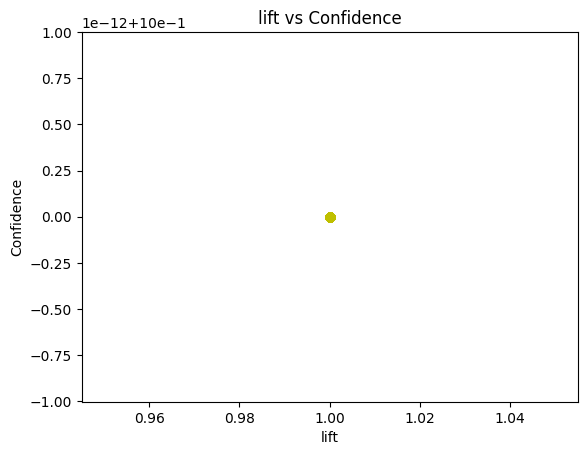

In [54]:
#Plot confidence and lift
fit = np.polyfit(rules_data['lift'], rules_data['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules_data['lift'], rules_data['confidence'], 'yo', rules_data['lift'], 
fit_fn(rules_data['lift']))
plt.xlabel('lift')
plt.ylabel('Confidence')
plt.title('lift vs Confidence')